## Análisis completo con Pandas

Este ejercicio muestra cómo usar Pandas para crear estructuras de datos, analizarlas, limpiar datos faltantes, agrupar y visualizar información, todo en un flujo unificado.

### Librerías necesarias

- `pandas`: para la manipulación de datos.
- `numpy`: para generación de números aleatorios y operaciones numéricas.
- `matplotlib.pyplot`: para crear gráficos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Paso 1: Crear y analizar una Series

In [2]:
# Series de temperaturas semanales
temperaturas = pd.Series([22, 25, 23, 27, 24, 26, 28],
                         index=['Lunes', 'Martes', 'Miércoles', 'Jueves',
                                'Viernes', 'Sábado', 'Domingo'])

print("Temperaturas de la semana:")
print(temperaturas)
print(f"Promedio: {temperaturas.mean():.1f}°C")
print(f"Día más caluroso: {temperaturas.idxmax()} ({temperaturas.max()}°C)")

Temperaturas de la semana:
Lunes        22
Martes       25
Miércoles    23
Jueves       27
Viernes      24
Sábado       26
Domingo      28
dtype: int64
Promedio: 25.0°C
Día más caluroso: Domingo (28°C)


### Paso 2: Crear un DataFrame de estudiantes y calcular promedio

In [3]:
# Crear datos de estudiantes
np.random.seed(42)
estudiantes_data = {
    'nombre': ['Ana', 'Carlos', 'María', 'José', 'Laura', 'Pedro', 'Sofia', 'Miguel'],
    'edad': [17, 18, 17, 18, 17, 18, 17, 18],
    'matematicas': np.random.randint(60, 100, 8),
    'ciencias': np.random.randint(65, 95, 8),
    'historia': np.random.randint(70, 98, 8)
}
df_estudiantes = pd.DataFrame(estudiantes_data)
df_estudiantes['promedio_general'] = df_estudiantes[['matematicas', 'ciencias', 'historia']].mean(axis=1)

print("Estudiantes con su promedio:")
print(df_estudiantes)

Estudiantes con su promedio:
   nombre  edad  matematicas  ciencias  historia  promedio_general
0     Ana    17           98        75        91         88.000000
1  Carlos    18           88        75        90         84.333333
2   María    17           74        88        71         77.666667
3    José    18           67        85        93         81.666667
4   Laura    17           80        68        81         76.333333
5   Pedro    18           98        72        75         81.666667
6   Sofia    17           78        88        71         79.000000
7  Miguel    18           82        67        97         82.000000


### Paso 3: Crear datos de ventas simuladas

In [4]:
# Generar datos de ventas ficticias
fechas = pd.date_range('2023-01-01', periods=100, freq='D')
productos = ['Laptop', 'Mouse', 'Teclado', 'Monitor', 'Audífonos']
ventas_data = []

for fecha in fechas:
    for _ in range(np.random.randint(1, 6)):
        venta = {
            'fecha': fecha,
            'producto': np.random.choice(productos),
            'cantidad': np.random.randint(1, 4),
            'precio_unitario': np.random.randint(20, 1000),
            'vendedor': np.random.choice(['Ana', 'Carlos', 'María'])
        }
        venta['total'] = venta['cantidad'] * venta['precio_unitario']
        ventas_data.append(venta)

df_ventas = pd.DataFrame(ventas_data)
df_ventas['mes'] = df_ventas['fecha'].dt.month

In [10]:
df_ventas.head()

,fecha,producto,cantidad,precio_unitario,vendedor,total,mes
0,2023-01-01,Laptop,2,41,Ana,82,1
1,2023-01-01,Monitor,1,580,María,580,1
2,2023-01-01,Teclado,3,701,María,2103,1
3,2023-01-01,Teclado,3,263,Ana,789,1
4,2023-01-01,Teclado,1,838,María,838,1


### Paso 4: Filtrar, agrupar y analizar ventas

In [5]:
# Ventas de laptops
laptops = df_ventas[df_ventas['producto'] == 'Laptop']
print(f"Total de laptops vendidas: {laptops['cantidad'].sum()}")
print(f"Ingresos por laptops: ${laptops['total'].sum():,.2f}")

# Ventas por vendedor
ventas_por_vendedor = df_ventas.groupby('vendedor')['total'].sum().sort_values(ascending=False)
print("\nIngresos por vendedor:")
print(ventas_por_vendedor)

# Productos más vendidos
productos_populares = df_ventas.groupby('producto')['cantidad'].sum().sort_values(ascending=False)
print("\nProductos más vendidos:")
print(productos_populares)

# Ventas por mes
ventas_mensuales = df_ventas.groupby('mes')['total'].sum()
print("\nVentas por mes:")
print(ventas_mensuales)

Total de laptops vendidas: 150
Ingresos por laptops: $76,021.00

Ingresos por vendedor:
vendedor
Carlos    114671
María     111397
Ana       103206
Name: total, dtype: int64

Productos más vendidos:
producto
Laptop       150
Teclado      147
Audífonos    125
Mouse        120
Monitor      109
Name: cantidad, dtype: int64

Ventas por mes:
mes
1    101122
2    102646
3    100787
4     24719
Name: total, dtype: int64


### Paso 5: Filtrado y ordenamiento de estudiantes

In [6]:
estudiantes_destacados = df_estudiantes[df_estudiantes['promedio_general'] > 85]
print(estudiantes_destacados[['nombre', 'promedio_general']])

jovenes_80 = df_estudiantes[(df_estudiantes['edad'] == 17) & (df_estudiantes['matematicas'] > 80)]
print(jovenes_80[['nombre', 'edad', 'matematicas']])

ordenados = df_estudiantes.sort_values('promedio_general', ascending=False)
print(ordenados[['nombre', 'promedio_general']])

  nombre  promedio_general
0    Ana              88.0
  nombre  edad  matematicas
0    Ana    17           98
   nombre  promedio_general
0     Ana         88.000000
1  Carlos         84.333333
7  Miguel         82.000000
3    José         81.666667
5   Pedro         81.666667
6   Sofia         79.000000
2   María         77.666667
4   Laura         76.333333


### Paso 6: Manejo de datos faltantes

In [7]:
#Simulando datos faltantes
datos_incompletos = df_estudiantes.copy()
datos_incompletos.loc[2, 'matematicas'] = np.nan
datos_incompletos.loc[5, 'ciencias'] = np.nan
datos_incompletos.loc[7, 'historia'] = np.nan
print(datos_incompletos.isnull().sum())

nombre              0
edad                0
matematicas         1
ciencias            1
historia            1
promedio_general    0
dtype: int64
84.42857142857143
78.0


/tmp/ipython-input-3424121760.py:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  con_interp = datos_incompletos.interpolate()


In [12]:
#Manejo de datos faltantes
sin_na = datos_incompletos.dropna()
con_media = datos_incompletos.fillna(datos_incompletos.mean(numeric_only=True))
con_interp = datos_incompletos.interpolate()
print(con_media.loc[2, 'matematicas'])
print(con_interp.loc[5, 'ciencias'])

84.42857142857143
78.0


/tmp/ipython-input-604419616.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  con_interp = datos_incompletos.interpolate()


### Paso 7: Agrupación múltiple y tabla pivote

In [8]:
analisis = df_ventas.groupby(['vendedor', 'producto']).agg({
    'cantidad': 'sum',
    'total': ['sum', 'mean', 'count']
}).round(2)

pivot = df_ventas.pivot_table(values='total', index='vendedor', columns='producto', aggfunc='sum', fill_value=0)
print(analisis)
print(pivot)

                   cantidad  total               
                        sum    sum     mean count
vendedor producto                                
Ana      Audífonos       44  20951  1047.55    20
         Laptop          44  20451   929.59    22
         Monitor         49  24222   968.88    25
         Mouse           29  15983  1065.53    15
         Teclado         52  21599   863.96    25
Carlos   Audífonos       50  25114  1046.42    24
         Laptop          61  33319  1041.22    32
         Monitor         22  11638   775.87    15
         Mouse           42  17985   946.58    19
         Teclado         51  26615  1064.60    25
María    Audífonos       31  17680   982.22    18
         Laptop          45  22251   927.12    24
         Monitor         38  17300   961.11    18
         Mouse           49  26727  1069.08    25
         Teclado         44  27439  1193.00    23
producto  Audífonos  Laptop  Monitor  Mouse  Teclado
vendedor                                       

### Paso 8: Visualización de datos

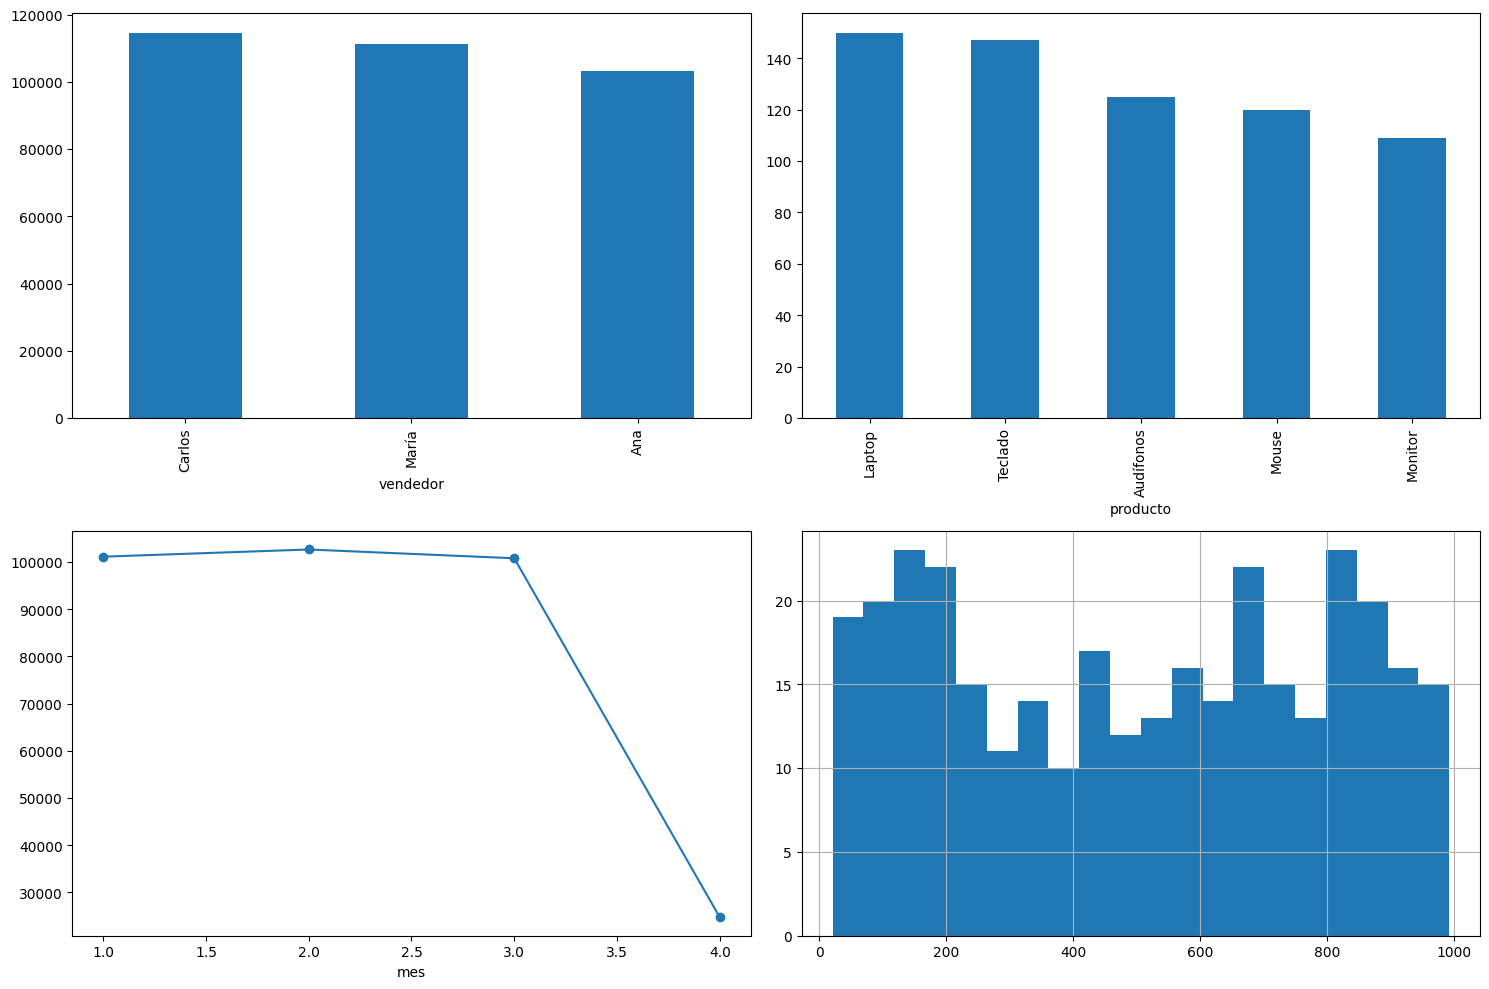

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
ventas_por_vendedor.plot(kind='bar', ax=axes[0,0])
productos_populares.plot(kind='bar', ax=axes[0,1])
ventas_mensuales.plot(kind='line', marker='o', ax=axes[1,0])
df_ventas['precio_unitario'].hist(bins=20, ax=axes[1,1])
plt.tight_layout()
plt.show()